In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')

In [6]:
df.shape

(11251, 15)

In [7]:
df.drop(['Status','unnamed1'], axis=1, inplace=True) #drop is used for fields to remove from data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace=True) # dropna is used to drop null values in dataset

In [13]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.rename(columns = {'Marital_Status':'Shadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Gender', ylabel='count'>

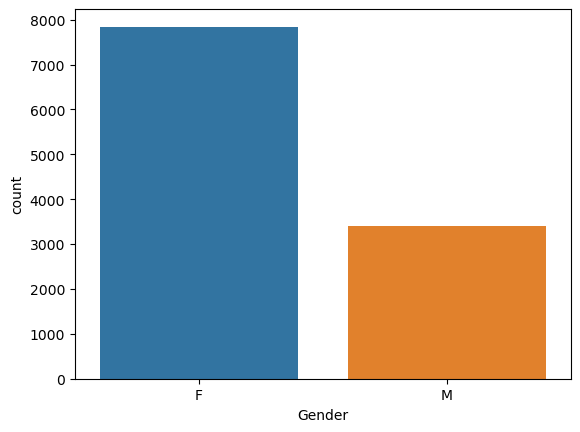

In [4]:
sns.countplot(x='Gender',data=df)

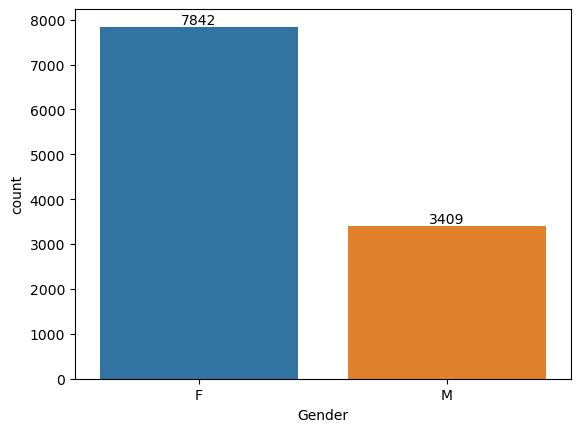

In [5]:
ax=sns.countplot(x='Gender',data=df)
# For bar lables we use for loop
for bars in ax.containers:
    ax.bar_label(bars)

### Total Amount vs Age Group

In [8]:
sales_data=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)

In [9]:
print(sales_data)

  Age Group       Amount
2     26-35  42613443.94
3     36-45  22144995.49
1     18-25  17240732.00
4     46-50   9207844.00
5     51-55   8261477.00
6       55+   4080987.00
0      0-17   2699653.00


<Axes: xlabel='Age Group', ylabel='count'>

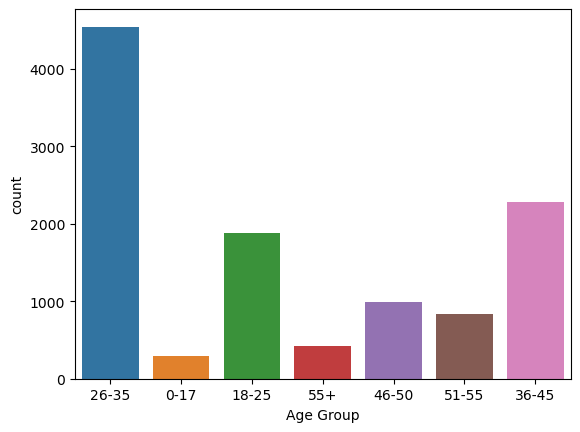

In [12]:
sns.countplot(x='Age Group',data=df)

<Axes: xlabel='Gender', ylabel='Amount'>

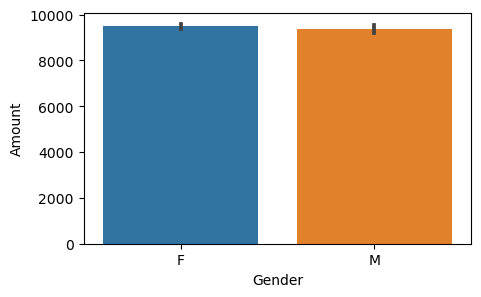

In [27]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=True)
plt_1 = plt.figure(figsize=(5, 3))
sns.barplot(x='Gender',y='Amount',data=df)
#print(sales_gen)

Axes(0.125,0.11;0.775x0.77)


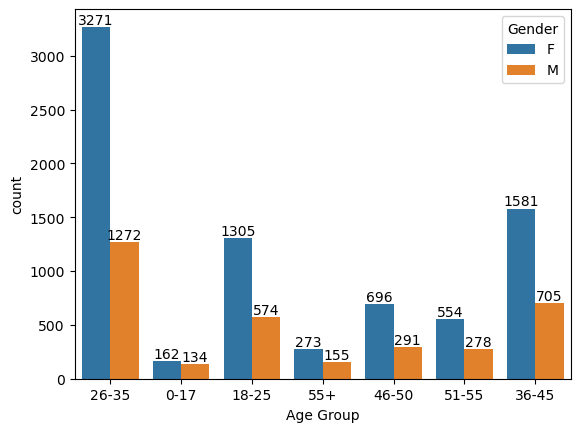

<Figure size 500x300 with 0 Axes>

In [36]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)
plt_2=plt.figure(figsize=(5,3))
for bars in ax.containers:
    ax.bar_label(bars)
print(ax)

Axes(0.125,0.11;0.775x0.77)


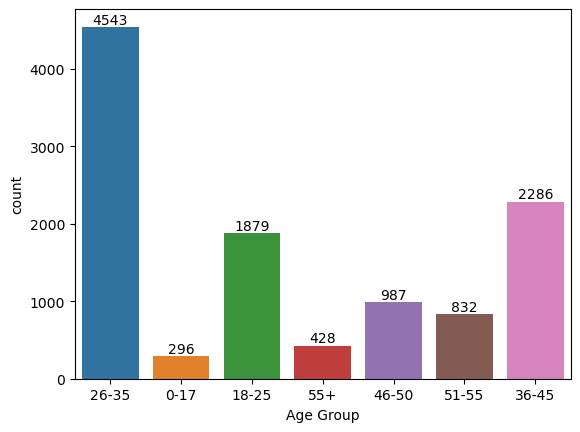

<Figure size 400x300 with 0 Axes>

In [40]:
bx=sns.countplot(x='Age Group',data=df)
plt_3=plt.figure(figsize=(4,3))
for bars in bx.containers:
    bx.bar_label(bars)
print(bx)

### Total Amount vs Age Group

  Age Group       Amount
0      0-17   2699653.00
1     18-25  17240732.00
2     26-35  42613443.94
3     36-45  22144995.49
4     46-50   9207844.00
5     51-55   8261477.00
6       55+   4080987.00


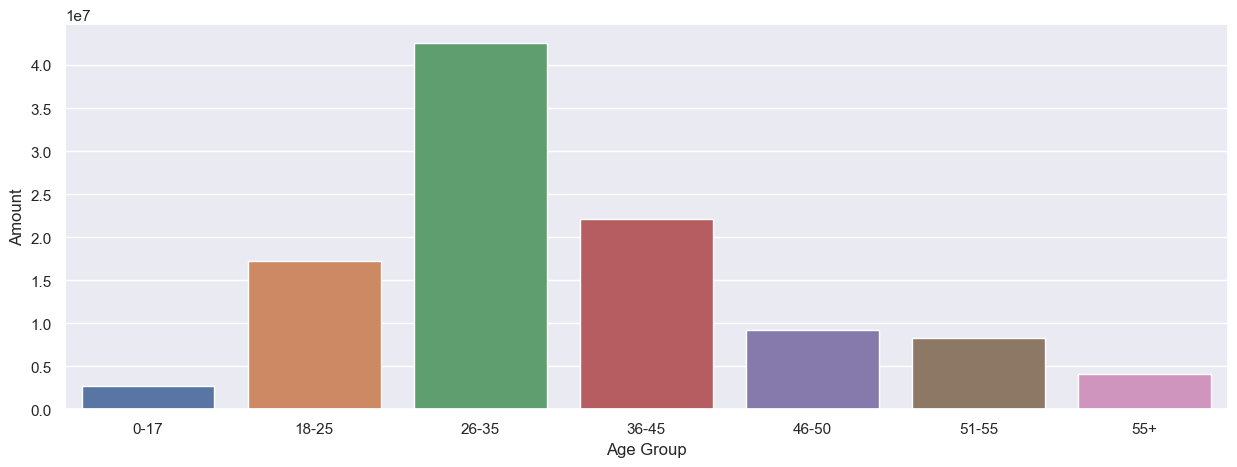

<Figure size 500x300 with 0 Axes>

In [80]:
cx=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(['Age Group'],ascending=True)
sns.barplot(x='Age Group',y='Amount',data=cx)
plt_4=plt.figure(figsize=(5,3))
print(cx)

#### Total no.of orders from top 10 states

In [60]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders')

               State  Orders
14     Uttar Pradesh    4813
10       Maharashtra    3811
7          Karnataka    3241
2              Delhi    2744
9     Madhya Pradesh    2259
0     Andhra Pradesh    2054
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1070


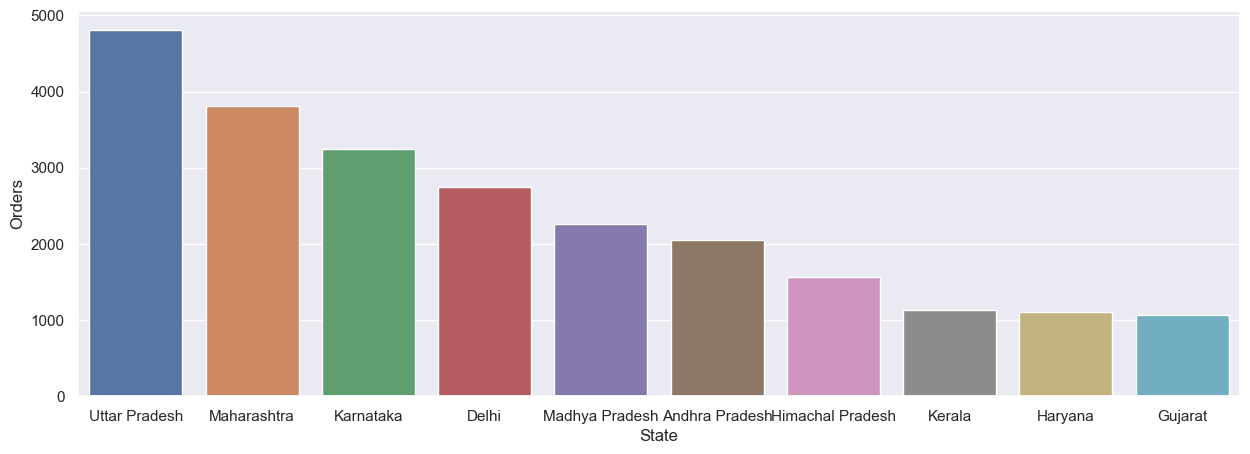

In [78]:
top_10=df.groupby('State',as_index=False)['Orders'].sum().sort_values(['Orders'],ascending=False).head(10)
sns.barplot(data=top_10,x='State',y='Orders')
sns.set(rc={'figure.figsize':(15,5)})
print(top_10)

#### Total no.of amount/sales from top 10 states

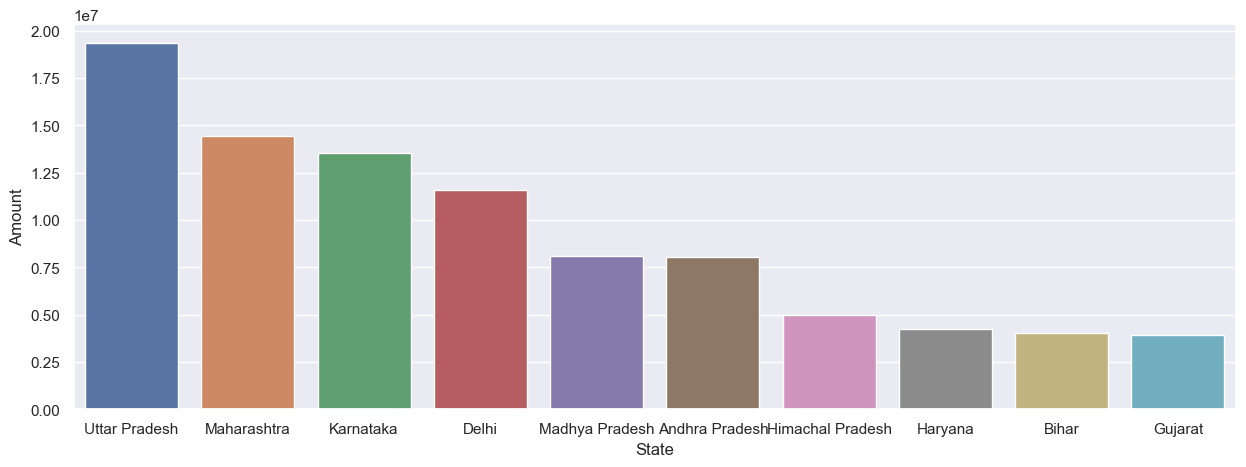

In [91]:
top10_states=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data=top10_states)
sns.set(rc={'figure.figsize':(15,5)})

## From above graphs we can see that unexpectedly most of the orders from the Utte Pradesh, Maharastra and kernataka respectively but total sales/amount is from UP,karnataka and then maharastra 

#### MARITAL STATUS

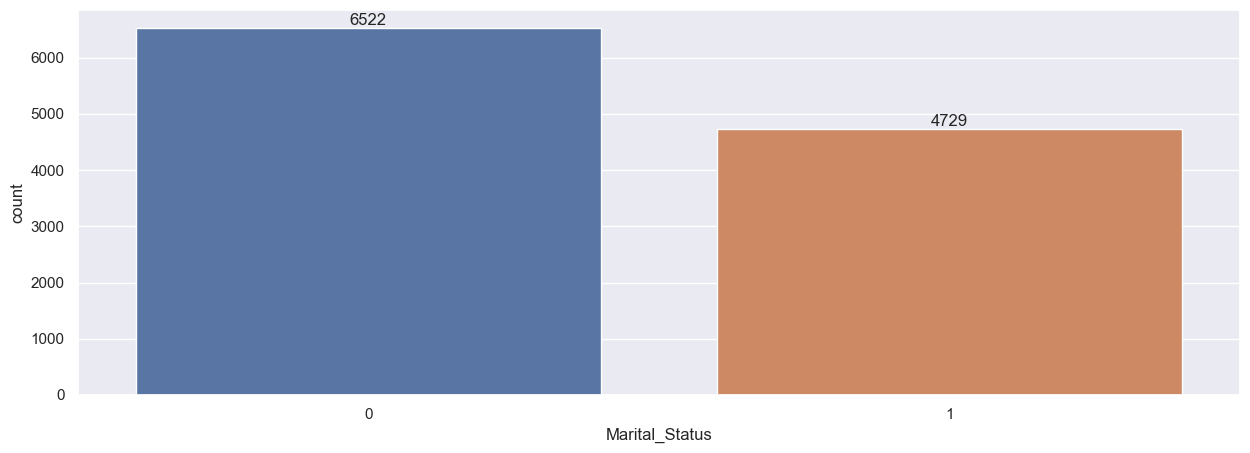

<Figure size 400x300 with 0 Axes>

In [98]:
ax=sns.countplot(x='Marital_Status',data=df)
plt_6=plt.figure(figsize=(4,3))
for bars in ax.containers:
    ax.bar_label(bars)

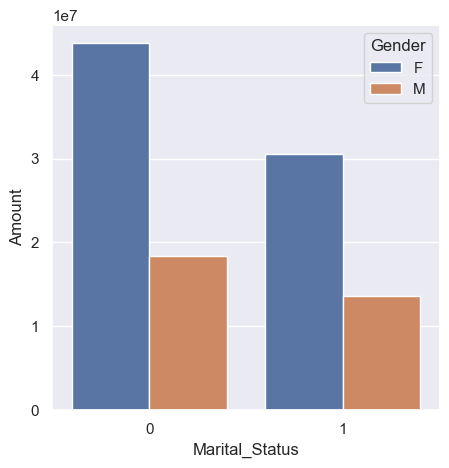

In [107]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')
sns.set(rc={'figure.figsize':(15,3)})

### From the above graph we can see that most of the buyers are married (Women) and they have high purchase power

#### OCCUPATION

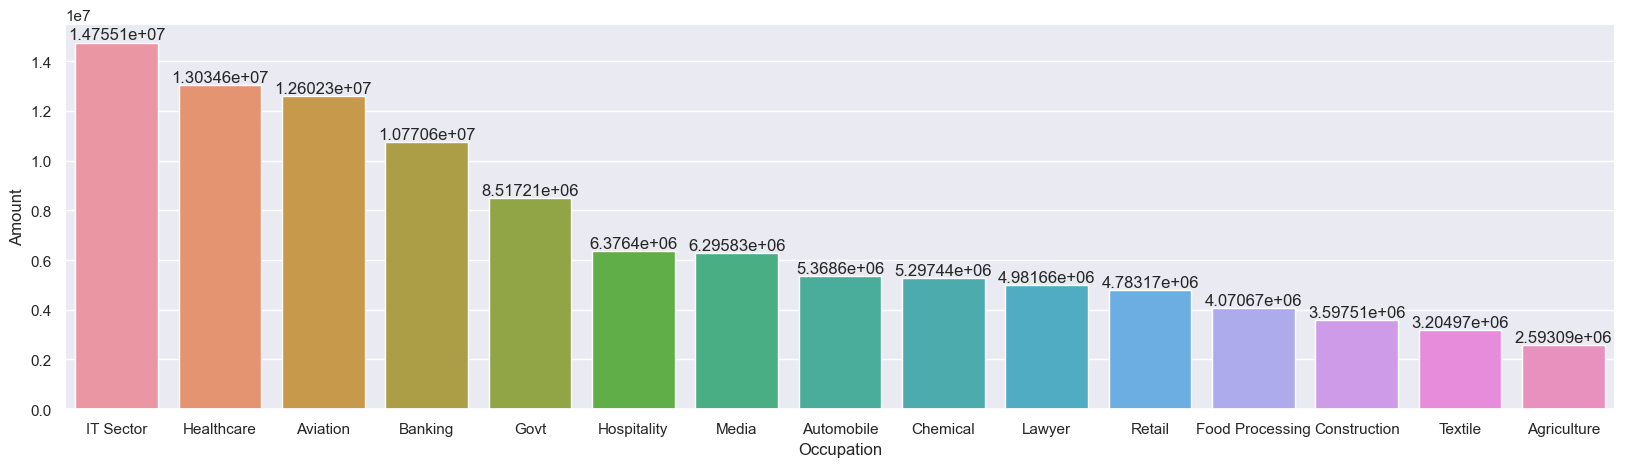

In [19]:
occ=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
ax=sns.barplot(x='Occupation',y='Amount',data=occ)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

### from the above graph we can see that most of the buyers are working in IT, Aviation and Health care Sector

#### PRODUCT CATEGORY

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

<Axes: xlabel='Product_Category', ylabel='Amount'>

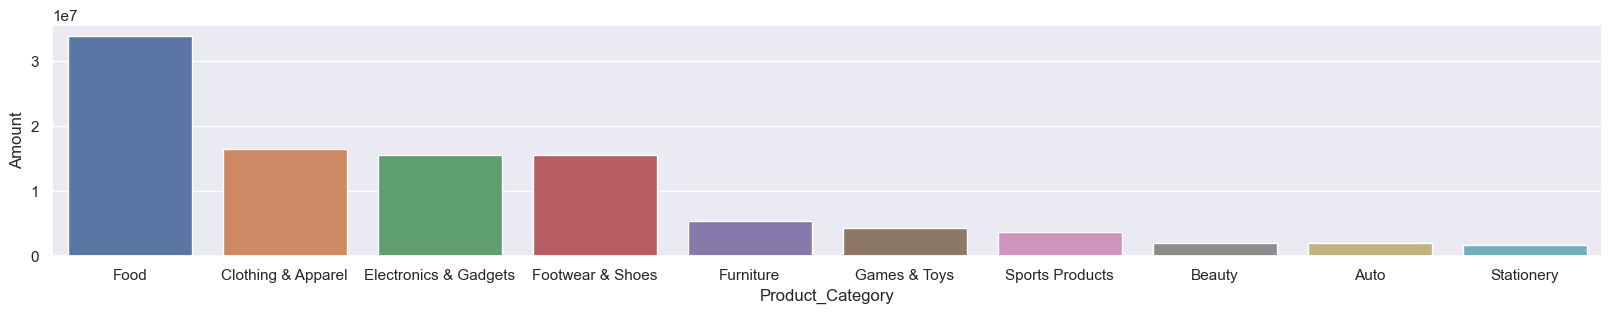

In [30]:
bx=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x='Product_Category',y='Amount',data=bx)

### Product_ID vs Orders

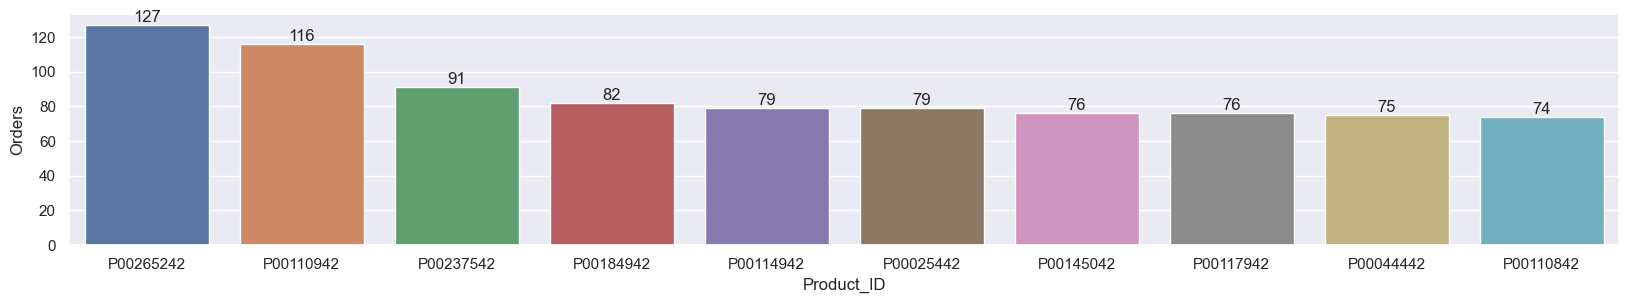

In [38]:
Sales=df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,3)})
cx=sns.barplot(x='Product_ID',y='Orders',data=Sales)
for bars in cx.containers:
    cx.bar_label(bars)

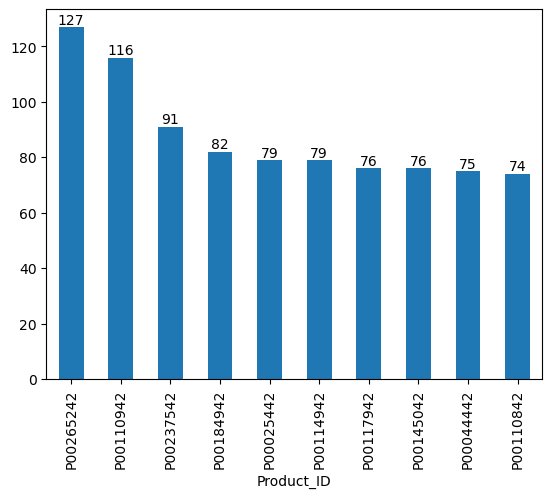

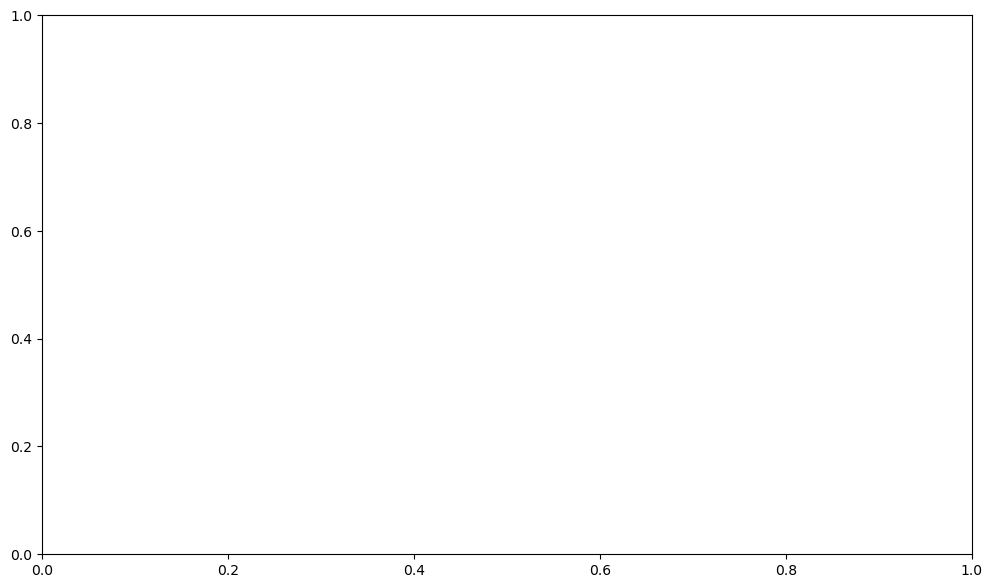

In [4]:
cx=df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
fig1, ax1=plt.subplots(figsize=(12,7))
for bars in cx.containers:
    cx.bar_label(bars)

<Axes: xlabel='Product_ID'>

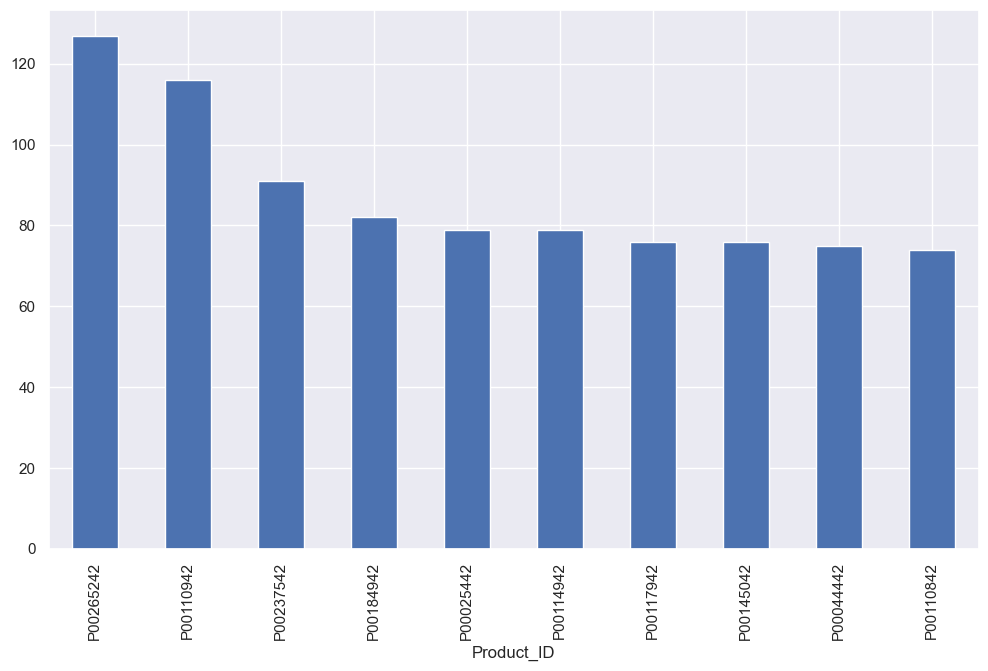

In [47]:
fig1, ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')